In [1]:
import gc
import sys
import pickle
import pandas as pd
import seaborn as sns
from scipy import stats
import seaborn as sns
import prwlr
from tqdm import tqdm
from functools import partial
from IPython.display import HTML

In [10]:
%matplotlib inline

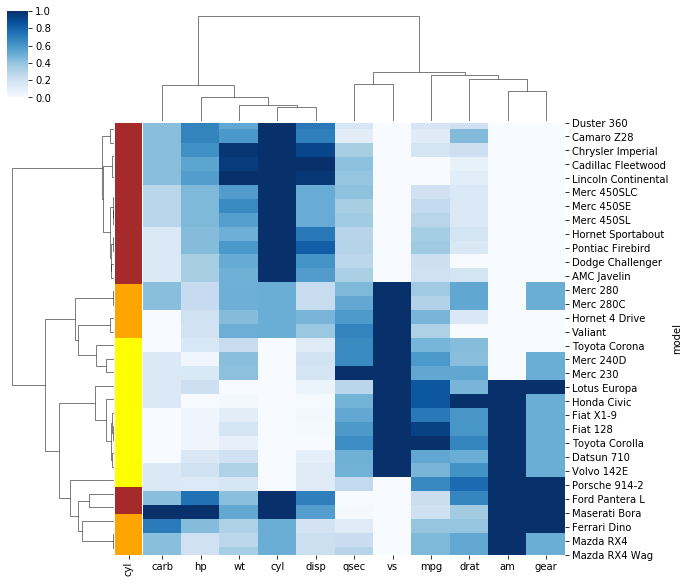

In [11]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
df

# Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip(df.cyl.unique(), ["orange","yellow","brown"]))
row_colors = df.cyl.map(my_palette)

# plot
sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)

In [13]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [72]:
df = pd.read_csv(
    './presentation-main-data/permutation-tests/physical-interactions-no-ko-dups-removal/PHYS_native_permuted_prof_str_aff_p_vals_plain_text_homo_sapiens.csv',
    sep='\t',
    index_col=[0],
)
# df.set_index(df['PROF_Q'] + '|' + df['PROF_A'], inplace=True)

# df.drop(columns=['PROF_Q', 'PROF_A'], inplace=True)

In [74]:
df.head()

,PROF_Q,PROF_A,native_higher,native_lower,per_number,p-value
0,-----------------,-----------------,False,True,1000,0.00
1,-----------------,-------+---------,False,True,30,0.97
2,-----------------,-------+---------,True,False,970,0.03
3,-----------------,----+------------,False,True,1000,0.00
4,-----------------,----+--+---------,True,False,1000,0.00


In [ ]:
df

In [60]:
df['significant'] = (df['p-value'] < 0.01).map({True: 1, False: 0})

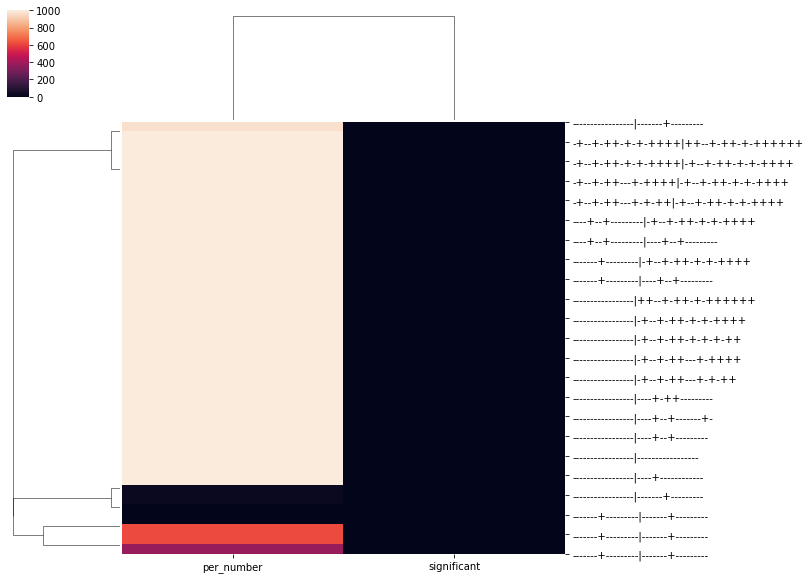

In [61]:
sns.clustermap(data=df.drop(columns=['native_higher', 'native_lower', 'p-value']), method='single')

In [63]:
df = pd.read_csv(
    './presentation-main-data/permutation-tests/physical-interactions-no-ko-dups-removal/PHYS_native_permuted_prof_str_aff_p_vals_plain_text_homo_sapiens.csv',
    sep='\t',
    index_col=[0],
)

In [64]:
df.head()

,PROF_Q,PROF_A,native_higher,native_lower,per_number,p-value
0,-----------------,-----------------,False,True,1000,0.00
1,-----------------,-------+---------,False,True,30,0.97
2,-----------------,-------+---------,True,False,970,0.03
3,-----------------,----+------------,False,True,1000,0.00
4,-----------------,----+--+---------,True,False,1000,0.00


# contents

1. [Part 1](#part1)

Define ElasticDict for fuzzy search

In [1]:
# Zip
class ElasticDict(dict):
    """
    Dictionary that does fuzzy search.
    Returns the first match if there are multiple mathes.
    """
    def __init__(
        self,
        dictionary,
    ):
        self._dictionary = dictionary
        for k, v in zip(self._dictionary.keys(), self._dictionary.values()):
            super().__setitem__(k, v)
            
    
    def __getitem__(
        self,
        key,
    ):
        for _ in self.keys():
            if key.lower() in _.lower():
                return super().__getitem__(_)

In [3]:
d = {'abc': 1}

In [4]:
d['a']

KeyError: 'a'

In [5]:
ed = ElasticDict(d)

In [8]:
ed['abc']

1

Presentation with figures

<body>
    <div style='
        border: 2px solid grey;
        border-radius: 20px;
        padding: 10px;
        text-align: center;
        margin: auto;
    '>
        hello
    </div>
</body>

# Porównanie częstości występowania interakcji genetycznych między genami o podobnych profilach filogenetycznych oraz ścieżkach metabolicznych/procesach biologicznych

# Sprawdzono 4 sieci interakcji:

- NxN *non-essential temperature-sensitive*
- ExE *essential temperature-sensitive*
- DAmP *essential lowered expression level*
- ExN_NxE *essential-non-essential temperature-sensitive*

<h1 align="center">Interakcje genetyczne o podobnych profilach są związane przede wszystkim z interakcjami negatywnymi</h1>

![](./presentation-main-data/figures/ExE_native_permuted_profs_paths_pos_inter_GIS_bins_NxN_window.svg)

![](./presentation-main-data/figures/ExE_native_permuted_profs_paths_neg_inter_GIS_bins_NxN_window.svg)

<h1 align="center">Efekt ten obserwowany jest przede wszystkim w przypadku sieci interakcji między genami essential, niezależnie od sposobu konstruowania mutantów</h1>

![](./presentation-main-data/figures/ExE_native_permuted_profs_paths_neg_inter_GIS_bins_NxN_window.svg)

![](./presentation-main-data/figures/DAmP_native_permuted_profs_paths_neg_inter_GIS_bins_NxN_window.svg)

### Self-made context

In [15]:
import os

In [27]:
import datetime
import time

class LogActivity(object):
    def __init__(self):
        pass

    def __enter__(self):
        self.enter_time = datetime.datetime.now()

    def __exit__(
        self,
        exc_type,
        exc_val,
        traceback,
    ):
        if not exc_type:
            self.exit_time = datetime.datetime.now()
            print(self.exit_time - self.enter_time)
        else:
            print('Something went wrong!')

with LogActivity() as log:
    time.sleep(3)

0:00:03.003105


### ```pandas.to_csv``` with compression

In [376]:
iris = sns.load_dataset('iris')

In [377]:
iris.to_csv('/tmp/')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### ```tqdm``` and ```yield```

In [355]:
def get_even(int_iterable):
    for i in tqdm(int_iterable):
        if i % 2 == 0: yield i

In [374]:
results = get_even(range(10))

In [375]:
for i in results:
    print('this is', i)

100%|██████████| 10/10 [00:00<00:00, 5620.13it/s]

this is 0
this is 2
this is 4
this is 6
this is 8


### Client code interaction using ```yield```

In [29]:
def responder(switch):
    while switch:
        client_question = (yield)
        if client_question:
            if 'status' in client_question:
                yield 'Status: on'
            elif 'version' in client_question:
                yield 'Version: 1'
            else:
                yield client_question

In [30]:
r = responder(switch=True)

In [38]:
next(r)

r.send('status')

'Status: on'

### ```__call__``` function

In [16]:
class Klass:
    def __init__(self, a):
        self.a = a
    def __call__(self):
        return self.a
    def __repr__(self):
        return 'This is: ' + self.a

In [17]:
k = Klass('foo')

In [30]:
k()

'foo'

### Decorators as class

In [25]:
class DecoratorAsClass:
    def __init__(
        self,
        function,
    ):
        self.function = function
    def __call__(
        self,
        *args,
        **kwargs,
    ):
        print('Before execution')
        result = self.function(*args, **kwargs)
        return result

In [26]:
@DecoratorAsClass
def f(x):
    return x

In [28]:
f('foo')

Before execution


'foo'

## Styling pandas

In [41]:
iris = sns.load_dataset('iris').drop(columns=['species'])

In [42]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 2 else 'black'
    return 'color: %s' % color

In [43]:
s = iris.style.applymap(color_negative_red)

In [44]:
s

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Dowload link in the alert window

In [47]:
HTML(
    """
    <a download="file.txt" href="data:text/csv;base64,{payload}">link</a>
    """
)

Properties

In [228]:
class Profile(object):
    """
    Phylogenetic Profile. Builds <profile>, which is just a boolean 1-D
    vector based on passed <query> and <reference>. Once these values are
    defined it allows modifications of the <reference> just by passing
    other values as <profile>
    """
    
    POSITIVE_SIGN = '+'
    NEGATIVE_SIGN = '-'
    
    def __init__(
        self,
        query:iter,
        reference:iter,
    ):
        self.query = frozenset(sorted(frozenset(query)))
        self.reference = frozenset(sorted(frozenset(reference)))
        
    @property
    def profile(self):
        return tuple(
            True if i in self.reference
            else False
            for i in self.query
        )
    
    @profile.setter
    def profile(
        self,
        new_profile,
    ):
        self.reference = list(self.reference)
        for q, np, op in zip(self.query, new_profile, self.profile):
            if np is not op:
                if np:
                    self.reference.append(q)
                else:
                    self.reference.remove(q)
        self.reference = frozenset(sorted(self.reference))
    
    def __repr__(self):
        return ''.join((
            '+' if i
            else '-'
            for i in self.profile
        ))

In [229]:
p = Profile(query=list('abc'), reference=list('cbdef'))
print(p.query, p.reference, p.profile, p)
p.profile = (True, True, True)
print(p.query, p.reference, p.profile, p)
p.profile = (False, False, False)
print(p.query, p.reference, p.profile, p)

frozenset({'b', 'a', 'c'}) frozenset({'e', 'c', 'b', 'd', 'f'}) (True, False, True) +-+
frozenset({'b', 'a', 'c'}) frozenset({'e', 'c', 'b', 'd', 'a', 'f'}) (True, True, True) +++
frozenset({'b', 'a', 'c'}) frozenset({'e', 'd', 'f'}) (False, False, False) ---


In [232]:
p.profile = (False, True, False)
print(p.query, p.reference, p.profile, p)

frozenset({'b', 'a', 'c'}) frozenset({'e', 'a', 'd', 'f'}) (False, True, False) -+-


Macros

In [235]:
def _f():
    print('foobar')

In [236]:
%macro __f 233
%store __f

Macro `__f` created. To execute, type its name (without quotes).
=== Macro contents: ===
def _f():
    print('foobar')
 Stored '__f' (Macro)


# Tests

In [580]:
def f(*a, **kwa):
    file_names = kwa['file_upload'].keys()
    file_contents = (
        io.StringIO(str(
            kwa['file_upload'][i]['content'],
            encoding='utf-8',
        ))
        for i in file_names
    )
    return pd.read_csv(next(file_contents), index_col=[0])

widgets.interact_manual(
    f,
    file_upload = widgets.FileUpload(
#         accept='',
    ),
)

interactive(children=(FileUpload(value={}, description='Upload'), Button(description='Run Interact', style=But…

<function __main__.f(*a, **kwa)>

In [770]:
AppLayout(
    header=widgets.Label('Header'),
    center=widgets.Label('Center'),
    left_sidebar=widgets.Label('Left'),
    right_sidebar=widgets.Label('right'),
    footer=widgets.Label('footer'),
)

AppLayout(children=(Label(value='Header', layout=Layout(grid_area='header')), Label(value='footer', layout=Lay…

In [8]:
api = prwlr.apis.KEGG_API()

with tempfile.NamedTemporaryFile(delete=True) as tmp:
    api.get_organisms_ids(tmp.name)

Skipping line 4648: Expected 3 fields in line 4648, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 5152: Expected 3 fields in line 5152, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 5153: Expected 3 fields in line 5153, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 5702: Expected 3 fields in line 5702, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.


<a class=anchor id=part1></a>
# Part